In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
salary = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16c4971af40>,
 'caps': [<matplotlib.lines.Line2D at 0x16c49727640>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c4971abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c49727d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c497340a0>],
 'means': []}

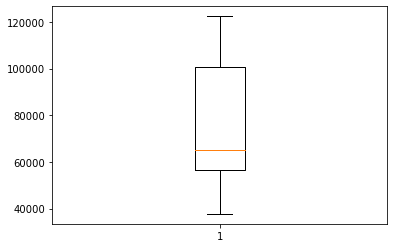

In [ ]:
plt.boxplot(salary['Salary'],vert = True)

In [ ]:

#Renaming the columns for ease of usage
salary1=salary.rename({'YearsExperience':'YExp', 'Salary':'Sal'},axis=1)

In [ ]:
#checing outliers

<AxesSubplot:xlabel='YExp'>

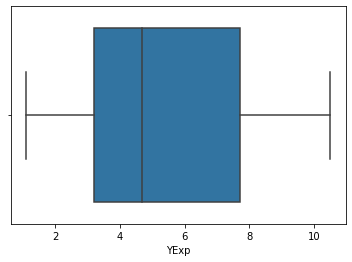

In [ ]:
sns.boxplot(x='YExp', data=salary1)

<AxesSubplot:xlabel='Sal'>

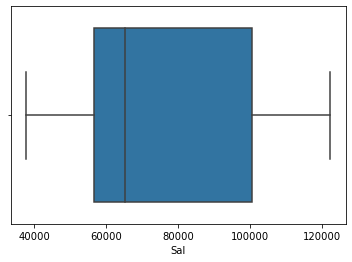

In [ ]:
sns.boxplot(x='Sal', data=salary1)

<AxesSubplot:xlabel='YExp', ylabel='Count'>

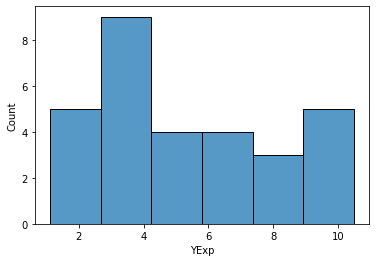

In [ ]:
sns.histplot(salary1.YExp)

<AxesSubplot:xlabel='Sal', ylabel='Count'>

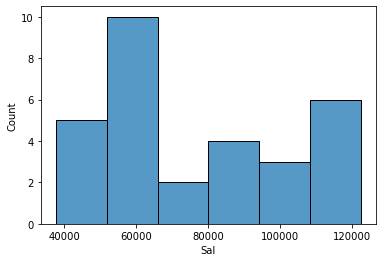

In [ ]:
sns.histplot(salary1.Sal)

In [ ]:
#Checking for duplicated rows

In [ ]:
salary1[salary1.duplicated()].shape

(0, 2)

In [ ]:
#Building the model

In [ ]:
model = smf.ols('Sal~YExp', data=salary1).fit()


<AxesSubplot:xlabel='YExp', ylabel='Sal'>

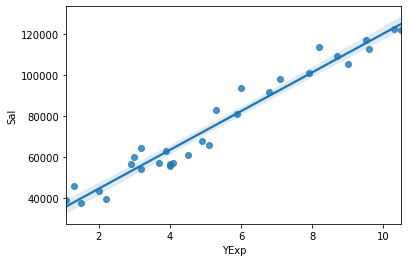

In [ ]:
sns.regplot(x='YExp', y='Sal', data=salary1)


In [ ]:
model.params

Intercept    25792.200199
YExp          9449.962321
dtype: float64

In [ ]:
print('pvalue:', model.pvalues, '\n','\n','Rsquared value is:', model.rsquared, '\n','\n', 
      'Adjusted Rsquared value is:', model.rsquared_adj)

pvalue: Intercept    5.511950e-12
YExp         1.143068e-20
dtype: float64 
 
 Rsquared value is: 0.9569566641435086 
 
 Adjusted Rsquared value is: 0.9554194021486339


#The R-Squared value is >0.95, hence we can say it's an excellent model and there's no need for any interation.

#Predicting the existing data

In [ ]:
pred = pd.DataFrame (model.predict(salary1), columns=['Predicted Salary'])

In [ ]:
pred1 = pd.concat([salary1, pred], axis=1)


In [ ]:
Error = pd.DataFrame ((pred1['Sal']- pred1['Predicted Salary']), columns=['Error'])


In [ ]:
final = pd.concat ([pred1, Error], axis=1)

In [ ]:
final

,YExp,Sal,Predicted Salary,Error
0,1.1,39343,36187.158752,3155.841248
1,1.3,46205,38077.151217,8127.848783
2,1.5,37731,39967.143681,-2236.143681
3,2.0,43525,44692.124842,-1167.124842
4,2.2,39891,46582.117306,-6691.117306
5,2.9,56642,53197.090931,3444.909069
6,3.0,60150,54142.087163,6007.912837
7,3.2,54445,56032.079627,-1587.079627
8,3.2,64445,56032.079627,8412.920373
9,3.7,57189,60757.060788,-3568.060788


#Predicting the new data

In [ ]:
new_data= pd.Series([5,7,11,15,20])

In [ ]:
pred_new = pd.DataFrame(new_data, columns=['YExp'])


In [ ]:
model.predict(pred_new)

0     73042.011806
1     91941.936449
2    129741.785735
3    167541.635020
4    214791.446628
dtype: float64